In [1]:
#import Standard dependencies

import cv2
import os
import random
import numpy as np 

from matplotlib import pyplot as plt

In [2]:
# import tensorflow dependencies

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense , MaxPooling2D, Input,Flatten
import tensorflow as tf 

In [7]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [8]:
len(gpus)

0

In [5]:
#setup paths 
POS_Path =os.path.join('data','positive')
NEG_Path =os.path.join('data','negative')
ANC_Path =os.path.join('data','anchor')  

In [6]:
os.makedirs(POS_Path)
os.makedirs(NEG_Path)
os.makedirs(ANC_Path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [6]:
import os

# Print the absolute paths
print("Positive Path:", os.path.abspath(POS_Path))
print("Negative Path:", os.path.abspath(NEG_Path))
print("Anchor Path:", os.path.abspath(ANC_Path))

Positive Path: C:\Users\DELL\data\positive
Negative Path: C:\Users\DELL\data\negative
Anchor Path: C:\Users\DELL\data\anchor


In [16]:
!tar -xf lfw.tgz

In [17]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_Path, file)
        os.replace(EX_PATH, NEW_PATH)

In [7]:
# Import uuid library to generate unique image names
import uuid

In [8]:
os.path.join(ANC_Path, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\b3219699-6d4f-11ef-adef-f34c16bcb63a.jpg'

In [67]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()

# Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_Path, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_Path, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [68]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
frame.shape

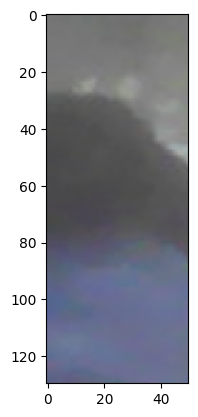

In [69]:
plt.imshow(frame[120:120+250,200:200+250, :])

In [7]:
anchor = tf.data.Dataset.list_files(ANC_Path+'\*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_Path+'\*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_Path+'\*.jpg').take(3000)

In [8]:
dir_test = anchor.as_numpy_iterator()

In [9]:
print(dir_test.next())

b'data\\anchor\\c0237066-6a34-11ef-a4f9-f34c16bcb63a.jpg'


In [10]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [14]:
img = preprocess(b'data\\anchor\\be7351f3-6a35-11ef-b8d3-f34c16bcb63a.jpg')

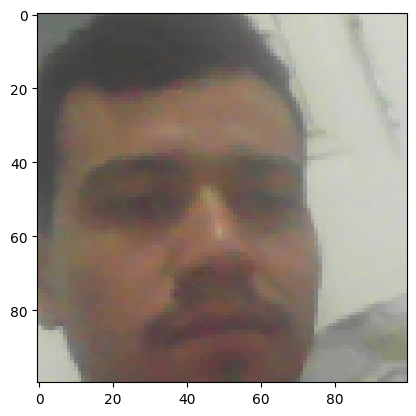

In [15]:
plt.imshow(img)

In [16]:
img.numpy().max() 

0.845098

In [17]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [15]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [16]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [11]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [12]:
samples = data.as_numpy_iterator()

In [13]:
exampple = samples.next()

In [14]:
exampple

(b'data\\anchor\\cccc4f16-6a35-11ef-898e-f34c16bcb63a.jpg',
 b'data\\positive\\02336cd8-6a37-11ef-9277-f34c16bcb63a.jpg',
 1.0)

In [15]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [16]:
res = preprocess_twin(*exampple)

In [23]:
res

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.4245098 , 0.43235293, 0.42843136],
         [0.4120098 , 0.41985294, 0.41593137],
         [0.40882352, 0.41666666, 0.4127451 ],
         ...,
         [0.51862746, 0.5264706 , 0.5205882 ],
         [0.5230392 , 0.5330882 , 0.5147059 ],
         [0.51862746, 0.5382353 , 0.5147059 ]],
 
        [[0.42647058, 0.43235293, 0.42941177],
         [0.41446078, 0.42034313, 0.4154412 ],
         [0.4137255 , 0.41960785, 0.40882352],
         ...,
         [0.5203431 , 0.5242647 , 0.52181375],
         [0.525     , 0.5362745 , 0.5242647 ],
         [0.5235294 , 0.5441176 , 0.52254903]],
 
        [[0.43333334, 0.43333334, 0.43333334],
         [0.41960785, 0.41960785, 0.41764706],
         [0.41666666, 0.41666666, 0.40882352],
         ...,
         [0.50661767, 0.5301471 , 0.52230394],
         [0.5019608 , 0.5372549 , 0.5240196 ],
         [0.5058824 , 0.5470588 , 0.5245098 ]],
 
        ...,
 
        [[0.7026961 , 0.7026961 

In [23]:
plt.imshow(res[1])

NameError: name 'res' is not defined

In [25]:
res[2]

1.0

In [17]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [18]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [19]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [20]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [28]:
inp = Input(shape=(100,100,3), name='input_image')

In [29]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [32]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [33]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [34]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [35]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [36]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [37]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [26]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image') 
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp) 
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1) 
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1) 
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2) 
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2) 
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3) 
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3) 
    f1 = Flatten()(c4) 
    d1 = Dense(4096, activation='sigmoid')(f1)  
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')     

In [27]:
embedding = make_embedding()

In [28]:
embedding.summary() 

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [29]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()       
 # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [30]:
l1 = L1Dist()

In [31]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [32]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [33]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [34]:
siamese_layer = L1Dist()

In [47]:
distances = siamese_layer(inp_embedding, val_embedding)

In [48]:
classifier = Dense(1, activation='sigmoid')(distances)

In [49]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [50]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [51]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [35]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [36]:
siamese_model = make_siamese_model()

In [37]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [38]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [56]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [34]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

NameError: name 'opt' is not defined

In [33]:
test_batch = train_data.as_numpy_iterator()

In [59]:
batch_1 = test_batch.next()

In [60]:
X = batch_1[:2]

In [61]:
y = batch_1[2]

In [62]:
y

array([1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

In [63]:
tf.losses.BinaryCrossentropy??

In [64]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [39]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [66]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [67]:
EPOCHS = 2

In [68]:
train(train_data, EPOCHS)


 Epoch 1/2
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
44/44 [==============================] - 2912s 66s/step
0.089852616 0.7723343 1.0

 Epoch 2/2
44/44 [==============================] - 4263s 97s/step
0.14979407 0.991453 0.9971347


In [37]:
from tensorflow.keras.metrics import Precision, Recall

In [38]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [39]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 3s 3s/step


In [72]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]

In [73]:
y_true

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

In [74]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [75]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [76]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 8s 8s/step
0.9933775 1.0


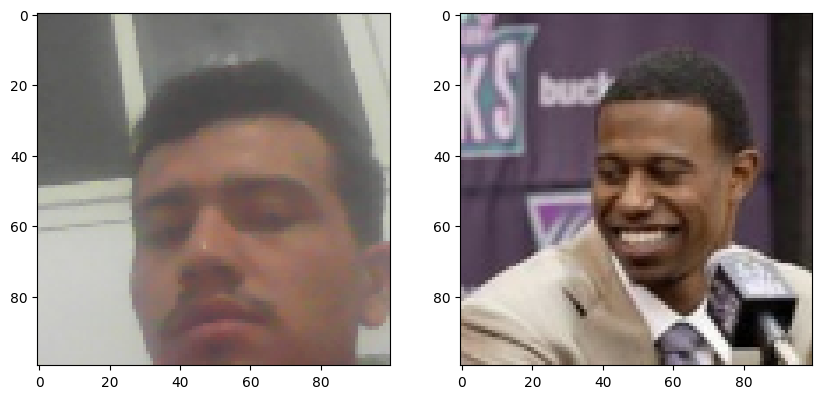

In [77]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [78]:
siamese_model.save('siamesemodelv2.h5') 

In [44]:
# Reload model 
from tensorflow.keras.models import load_model
siamese_model = load_model(r'siamesemodelv2.h5', custom_objects={'L1Dist': L1Dist})

ValueError: Unrecognized keyword arguments: ['batch_shape']

In [40]:
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 2s 2s/step


array([[4.6280217e-01],
       [1.7536893e-05],
       [9.9072945e-01],
       [9.9140692e-01],
       [3.9340771e-06],
       [8.9755893e-01],
       [9.9797374e-01],
       [9.7553802e-01],
       [9.9405265e-01],
       [9.0337366e-01],
       [1.4167319e-06],
       [7.1465812e-04],
       [7.9966617e-01],
       [7.5301655e-06],
       [9.9731922e-01],
       [4.1559350e-08]], dtype=float32)

In [41]:
application_data\verification_images

SyntaxError: unexpected character after line continuation character (2818603333.py, line 1)

In [42]:
os.listdir(os.path.join('application_data', 'verification_images'))


['0005b350-6a37-11ef-8600-f34c16bcb63a.jpg',
 '000a8c32-6a37-11ef-ba3a-f34c16bcb63a - Copy.jpg',
 '000a8c32-6a37-11ef-ba3a-f34c16bcb63a.jpg',
 '000f7e7e-6a37-11ef-9623-f34c16bcb63a.jpg',
 '001d7f36-6a37-11ef-ad6b-f34c16bcb63a.jpg',
 '007cd922-6a37-11ef-bd44-f34c16bcb63a.jpg',
 '00a4f0cb-6a37-11ef-b355-f34c16bcb63a.jpg',
 '00a9a3c3-6a37-11ef-859a-f34c16bcb63a.jpg',
 '00ae42c3-6a37-11ef-b890-f34c16bcb63a.jpg',
 '00b32250-6a37-11ef-b1b3-f34c16bcb63a.jpg',
 '00b7c584-6a37-11ef-8f76-f34c16bcb63a.jpg',
 '00bca085-6a37-11ef-b1de-f34c16bcb63a.jpg',
 '00ccf650-6a37-11ef-800d-f34c16bcb63a.jpg',
 '00d1c6f4-6a37-11ef-a481-f34c16bcb63a.jpg',
 '00d6a1bc-6a37-11ef-83d0-f34c16bcb63a.jpg',
 '00dbafa8-6a37-11ef-9d02-f34c16bcb63a.jpg',
 '00fa4e14-6a37-11ef-b820-f34c16bcb63a.jpg',
 '00ff1d11-6a37-11ef-9101-f34c16bcb63a.jpg',
 '011e93b2-6a37-11ef-b43c-f34c16bcb63a.jpg',
 '014ff77a-6a37-11ef-9688-f34c16bcb63a.jpg',
 '016c82b5-6a37-11ef-80b5-f34c16bcb63a.jpg',
 '017ad9c1-6a37-11ef-b066-f34c16bcb63a.jpg',
 '0

In [43]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [44]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\0005b350-6a37-11ef-8600-f34c16bcb63a.jpg
application_data\verification_images\000a8c32-6a37-11ef-ba3a-f34c16bcb63a - Copy.jpg
application_data\verification_images\000a8c32-6a37-11ef-ba3a-f34c16bcb63a.jpg
application_data\verification_images\000f7e7e-6a37-11ef-9623-f34c16bcb63a.jpg
application_data\verification_images\001d7f36-6a37-11ef-ad6b-f34c16bcb63a.jpg
application_data\verification_images\007cd922-6a37-11ef-bd44-f34c16bcb63a.jpg
application_data\verification_images\00a4f0cb-6a37-11ef-b355-f34c16bcb63a.jpg
application_data\verification_images\00a9a3c3-6a37-11ef-859a-f34c16bcb63a.jpg
application_data\verification_images\00ae42c3-6a37-11ef-b890-f34c16bcb63a.jpg
application_data\verification_images\00b32250-6a37-11ef-b1b3-f34c16bcb63a.jpg
application_data\verification_images\00b7c584-6a37-11ef-8f76-f34c16bcb63a.jpg
application_data\verification_images\00bca085-6a37-11ef-b1de-f34c16bcb63a.jpg
application_data\verification_images\00ccf650-6a37-11ef-8

In [45]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [46]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [47]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
np.sum(np.squeeze(results) > 0.9)

In [ ]:
results